# Using Gaussian Mixture Models to determine the number of states, given inputs such as retuen and range, to identify what regime the market is in. 

In [49]:
import pandas as pd
import numpy as np
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


In [50]:
# Extract data
data = pdr.get_data_yahoo("AAPL","2016-01-1","2022-06-1")
data = data[["Open", "High", "Low", "Adj Close", "Volume"]]

[*********************100%%**********************]  1 of 1 completed


In [51]:
data

,Open,High,Low,Adj Close,Volume
Date,,,,,
2016-01-04,25.652500,26.342501,25.500000,23.977472,270597600
2016-01-05,26.437500,26.462500,25.602501,23.376617,223164000
2016-01-06,25.139999,25.592501,24.967501,22.919138,273829600
2016-01-07,24.670000,25.032499,24.107500,21.951849,324377600
2016-01-08,24.637501,24.777500,24.190001,22.067928,283192000
...,...,...,...,...,...
2022-05-24,140.809998,141.970001,137.330002,139.155350,104132700
2022-05-25,138.429993,141.789993,138.339996,139.313995,92482700
2022-05-26,137.389999,144.339996,137.139999,142.546005,90601500


In [52]:
# Add features 
df = data.copy()
df["Returns"] = (df["Adj Close"] / df["Adj Close"].shift(1)) - 1
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)
display(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1613 entries, 2016-01-05 to 2022-05-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1613 non-null   float64
 1   High       1613 non-null   float64
 2   Low        1613 non-null   float64
 3   Adj Close  1613 non-null   float64
 4   Volume     1613 non-null   int64  
 5   Returns    1613 non-null   float64
 6   Range      1613 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 100.8 KB


None

In [53]:
X_train = df[["Returns", "Range"]]
X_train.head()

,Returns,Range
Date,,
2016-01-05,-0.025059,0.033590
2016-01-06,-0.019570,0.025033
2016-01-07,-0.042204,0.038370
2016-01-08,0.005288,0.024287
2016-01-11,0.016192,0.017670


In [54]:
# train Gaussian Model
model = GaussianMixture(n_components=4, covariance_type='tied')
model.fit(np.array(X_train.values))

GaussianMixture(covariance_type='tied', n_components=4)

In [55]:
states = model.predict(X_train.values)
print(states[:40])
len(states)

[2 0 2 0 0 0 2 3 2 0 2 0 3 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 3 0]


1613

In [56]:
prices = df["Adj Close"].values.astype(float)
print("Correct number of rows: ", len(prices) == len(states))

labels = [[float('nan')] * len(states) for _ in range(4)]

for i, state in enumerate(states):
    if 0 <= state <= 3:
        labels[state][i] = prices[i]

labels_0, labels_1, labels_2, labels_3 = labels

Correct number of rows:  True


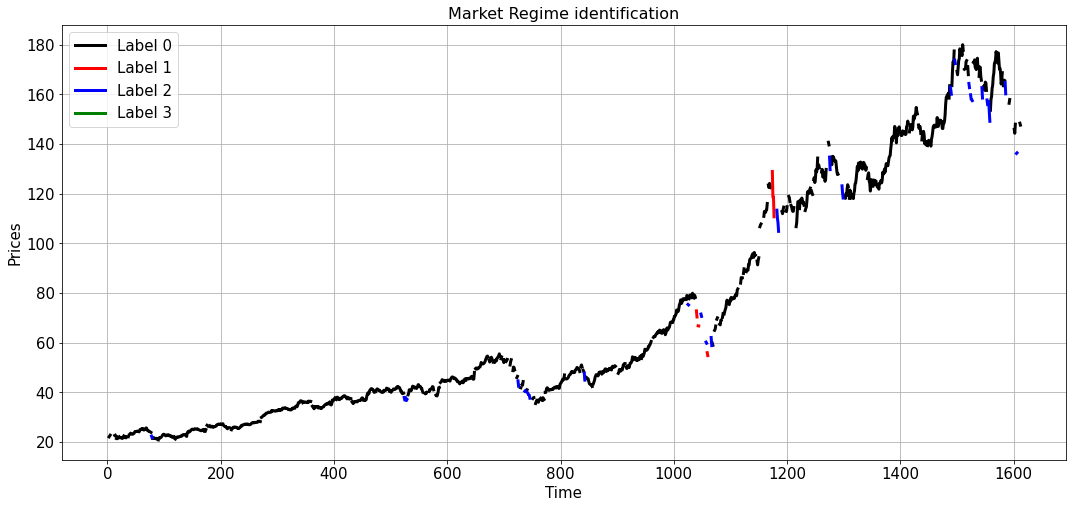

In [57]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(18, 8))

plt.plot(labels_0, color="black", linewidth=3, label='Label 0')
plt.plot(labels_1, color="red", linewidth=3, label='Label 1') 
plt.plot(labels_2, color="blue", linewidth=3, label='Label 2')  
plt.plot(labels_3, color="green", linewidth=3, label='Label 3')  

plt.title('Market Regime identification', fontsize=16)
plt.xlabel('Time', fontsize=15)
plt.ylabel('Prices', fontsize=15)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(fontsize=15)
plt.grid(True)
plt.show()


# evaluation

In [58]:
#Test Data
# Extract data
data_test = pdr.get_data_yahoo("AAPL","2022-06-2","2023-06-1")
data_test = data_test[["Open", "High", "Low", "Adj Close", "Volume"]]

# Add features 
df_test = data_test.copy()
df_test["Returns"] = (df_test["Adj Close"] / df_test["Adj Close"].shift(1)) - 1
df_test["Range"] = (df_test["High"] / df_test["Low"]) - 1
df_test.dropna(inplace=True)
display(df_test.info())

[*********************100%%**********************]  1 of 1 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2022-06-03 to 2023-05-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       249 non-null    float64
 1   High       249 non-null    float64
 2   Low        249 non-null    float64
 3   Adj Close  249 non-null    float64
 4   Volume     249 non-null    int64  
 5   Returns    249 non-null    float64
 6   Range      249 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 15.6 KB


None

In [59]:
X_test = df_test[["Returns", "Range"]]
X_test.head()

,Returns,Range
Date,,
2022-06-03,-0.038556,0.024297
2022-06-06,0.005228,0.025328
2022-06-07,0.017586,0.034004
2022-06-08,-0.005043,0.016343
2022-06-09,-0.035956,0.038027


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but GaussianMixture was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


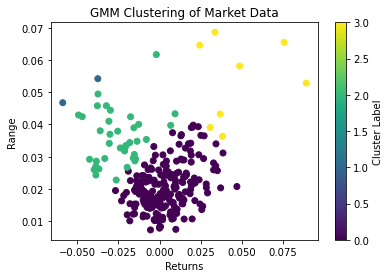

Silhouette Score: 0.3879042820420116


In [60]:
labels_test = model.predict(X_test)

# Calculating silhouette score
silhouette = silhouette_score(X_test, labels_test)

# Plotting
plt.scatter(X_test['Returns'], X_test['Range'], c=labels_test, cmap='viridis', marker='o')
plt.title('GMM Clustering of Market Data')
plt.xlabel('Returns')
plt.ylabel('Range')
plt.colorbar(label='Cluster Label')
plt.show()

print("Silhouette Score:", silhouette)